In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("/Users/katyakraft/Documents/IronHack/GitRepositories/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [7]:
#PART 1: 1. Frequency Table
#Generate a frequency table for the product category. Which are the top 5 most listed product categories?
frequency_table = df['category'].value_counts()
top_5_categories = frequency_table.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

/var/folders/9k/2yrc93qj3w58wsw_h7nj8x1h0000gn/T/ipykernel_73563/4036744184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");
/var/folders/9k/2yrc93qj3w58wsw_h7nj8x1h0000gn/T/ipykernel_73563/4036744184.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3");


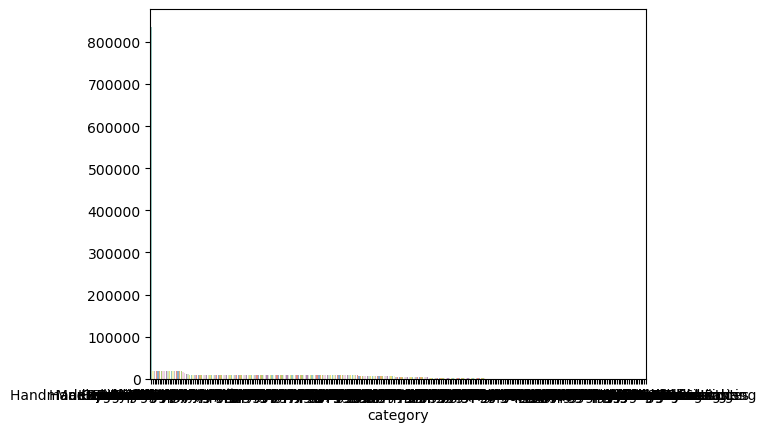

In [11]:
#2. Visualizations:
#Display the distribution of products across different categories using a bar chart. 
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");

/var/folders/9k/2yrc93qj3w58wsw_h7nj8x1h0000gn/T/ipykernel_73563/2121047835.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3");


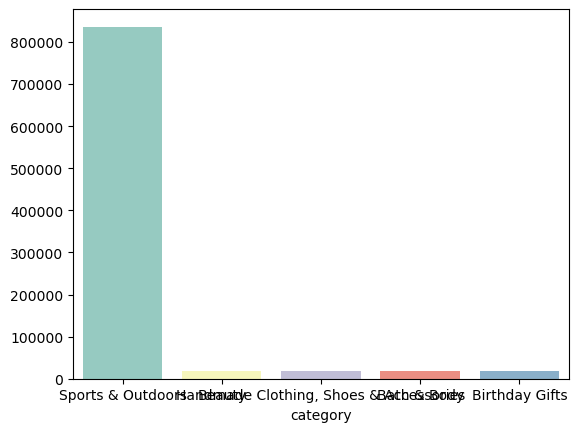

In [13]:
#If you face problems understanding the chart, do it for a subset of top categories.
sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3");

<Axes: ylabel='count'>

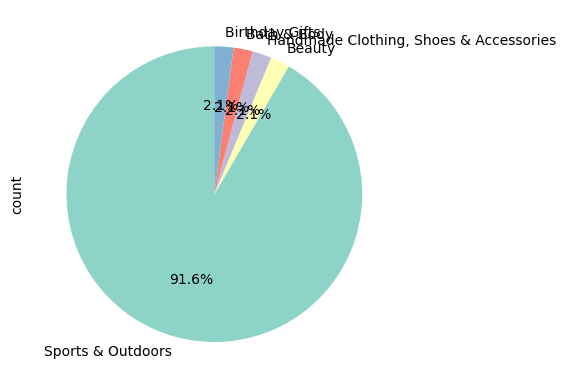

In [17]:
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
top_5_categories.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
#Sports & Outdoors dominate the listings.

In [33]:
#PART 2: 1. Measures of Centrality:
#Calculate the mean, median, and mode for the price of products.
#What's the average price point of products listed? How does this compare with the most common price point (mode)?

df["price"].describe()
df["price"].mode()
# The average price is 8.93, and the most common price point is 9.99. The average price is lower than the most common price.

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [39]:
#2. Measures of Dispersion:
# Determine the variance, standard deviation, range, and interquartile range for product price.
#How varied are the product prices? Are there any indicators of a significant spread in prices?

variance_price = df["price"].var()
standard_deviation_price = df["price"].std()
range_price = df["price"].max() - df["price"].min()
quantiles_price = df["price"].quantile([0.25, 0.5, 0.75])
variance_price, standard_deviation_price, range_price, quantiles_price

#The product prices are very varied, probably there are some very high prices in comparison with the average and mode price. 
#The std shows that on svg the product price differs from the median by 345 dollars.

(119445.4853225653,
 345.6088617535223,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

<Axes: xlabel='price', ylabel='Count'>

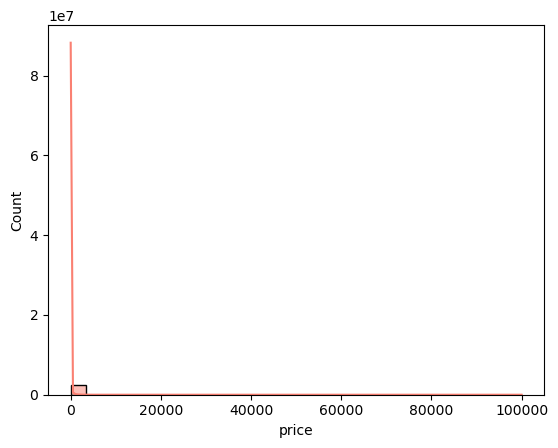

In [41]:
#3. Visualizations:

#Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
#If its hard to read these diagrams, think why this is, and explain how it could be solved..
#Are there products that are priced significantly higher than the rest? 
#Use a box plot to showcase the spread and potential outliers in product pricing.

sns.histplot(df["price"], kde=True, bins=30, color="salmon")

<Axes: ylabel='price'>

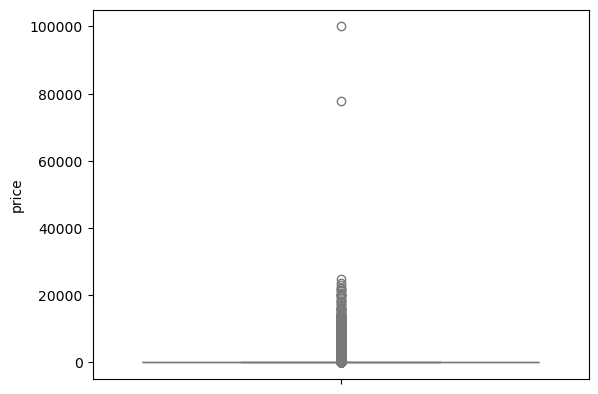

In [45]:
sns.boxplot(data = df["price"], color="lightblue")

In [ ]:
#It's very hard to read these results, because there are a lot of extreme values. One way to solve this would be zooming into the graphs or drop som of the outliers.

In [98]:
#Part 3: Unpacking Product Ratings
#1. Calculate the mean, median, and mode for the rating of products. How do customers generally rate products? Is there a common trend?

filtered_df = df[df['stars'] != 0.0] #taking out the 0.0 ratings, because those mean that people didn't leave rating.

filtered_df["stars"].mean()
filtered_df["stars"].median()
filtered_df["stars"].mode()

print(f"Mean Rating: {filtered_df["stars"].mean()}")
print(f"Median Rating: {filtered_df["stars"].median()}")
print(f"Mode Rating: {filtered_df["stars"].mode()}")

#The common trend is to give high ratings, between 4 and 5 stars.

Mean Rating: 4.31916076222691
Median Rating: 4.4
Mode Rating: 0    4.5
Name: stars, dtype: float64


In [96]:
#2.Measures of Dispersion:
#Determine the variance, standard deviation, and interquartile range for product rating.
#Are the ratings consistent, or is there a wide variation in customer feedback?

Q1 = filtered_df['stars'].quantile(0.25)
Q3 = filtered_df['stars'].quantile(0.75)
iqr = Q3 - Q1

print(f"Variance Rating: {filtered_df["stars"].var()}")
print(f"Standard Deviation Rating: {filtered_df["stars"].std()}")
print(f"Interquartile Range Rating: {iqr}")

#variance and standard deviation values being relatively low suggest that most ratings are close to the mean
#iqr of 0.5 indicates that the middle 50% of ratings are tightly clustered, showing consistency.

Variance Rating: 0.30834337523805183
Standard Deviation Rating: 0.5552867504614637
Interquartile Range Rating: 0.5


In [79]:
#3. Shape of the Distribution:
#Calculate the skewness and kurtosis for the rating column.
#Are the ratings normally distributed, or do they lean towards higher or lower values?
filtered_df["stars"].skew()
filtered_df["stars"].kurtosis()

print(f"Skewness Rating: {filtered_df["stars"].skew()}")
print(f"Kurtosis Rating: {filtered_df["stars"].kurtosis()}")

#Negative skewness indicates that the distribution has a longer tail on the left side. There are more ratings at the higher end (closer to 5), 
#with fewer ratings towards the lower end (closer to 1).
#Kurtosis of 9.8 suggests that there are significantly more ratings that are very high and also a higher number of extreme low 
#ratings compared to a normal distribution. There are outlier ratings.

Skewness Rating: -2.3795681122127945
Kurtosis Rating: 9.78193769066435


<Axes: xlabel='stars', ylabel='Count'>

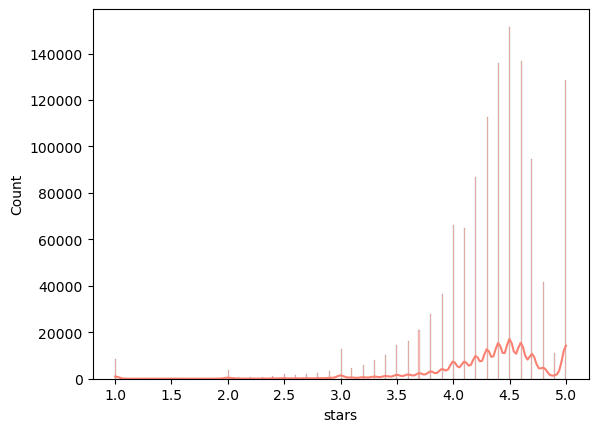

In [81]:
#4.Visualizations:
#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

sns.histplot(filtered_df["stars"], kde=True, color="salmon")

# Almost 50% of the customers tend not to rate the products of Amazon. 
#And for the ones that do rate the products, most tend to rate them between 4 and 5 stars.

In [94]:
filtered_df.shape
df.shape
1218010/2443651

0.49843860682233265